In [1]:
from pathlib import Path

ROOT = Path(globals()['__vsc_ipynb_file__']).parent.parent
print(ROOT)

import sys
sys.path.append(str(ROOT))

/Users/gabrieleagliardi/Documents/GitHub/Client-Vanguard-Optimization


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from src.experiment import Experiment

In [3]:
df_all = Experiment.df_experiments(Experiment.read_experiments())

In [4]:
df_all.head()

,experiment_id,local_search_doe,ansatz,theta_initial,device,optimizer,alpha,theta_threshold,lp_file,shots,...,ansatz_params_entanglement,last_improvement_iter,step3_x_diff,step3_x_hamming_weight,step3_rel_gap,step3_num_thetas,has_step4,step4_x_diff,step4_x_hamming_weight,step4_rel_gap
0,TwoLocal2rep_piby3_AerSimulator_0.1/3,long,TwoLocal,piby3,AerSimulator,nft,0.1,0,/Users/gabrieleagliardi/Documents/GitHub/Clien...,8192,...,bilinear,6,8.0,21,0.000587,93,True,18.0,11.0,49108.748708
1,TwoLocal2rep_piby3_AerSimulator_0.1/2,fast,TwoLocal,piby3,AerSimulator,nft,0.1,0,/Users/gabrieleagliardi/Documents/GitHub/Clien...,8192,...,bilinear,68,0.0,21,0.000000,93,True,0.0,21.0,0.000000
2,TwoLocal2rep_piby3_AerSimulator_0.1/7,fast,TwoLocal,piby3,AerSimulator,nft,0.1,0,/Users/gabrieleagliardi/Documents/GitHub/Clien...,8192,...,bilinear,232,6.0,21,0.000645,93,True,0.0,21.0,0.000000
3,TwoLocal2rep_piby3_AerSimulator_0.1/4,long,TwoLocal,piby3,AerSimulator,nft,0.1,0,/Users/gabrieleagliardi/Documents/GitHub/Clien...,8192,...,bilinear,24,4.0,21,0.000186,93,True,19.0,10.0,73872.032132
4,TwoLocal2rep_piby3_AerSimulator_0.1/8,None,TwoLocal,piby3,AerSimulator,nft,0.1,0,/Users/gabrieleagliardi/Documents/GitHub/Clien...,8192,...,bilinear,55,8.0,21,0.000408,93,False,NaN,NaN,NaN


In [5]:
print("\n".join(df_all.columns))

experiment_id
local_search_doe
ansatz
theta_initial
device
optimizer
alpha
theta_threshold
lp_file
shots
refx
refvalue
classical_hw
step3_time
step4_time
step3_job_ids
step3_fx_evals
step3_result_success
step3_result_message
step3_result_best_x
step3_result_best_fx
step4_num_epochs
step4_fx_evals
step4_result_best_x
step4_result_best_fx
step3_monitor_iter_thetas
step3_monitor_iter_gtheta
step3_monitor_iter_best_fx
step3_monitor_calls_thetas
step3_monitor_calls_gtheta
step3_iter_best_x
step3_iter_best_fx
step3_iter_fx_evals
step4_iter_best_fx
notes
ansatz_params_reps
ansatz_params_entanglement
last_improvement_iter
step3_x_diff
step3_x_hamming_weight
step3_rel_gap
step3_num_thetas
has_step4
step4_x_diff
step4_x_hamming_weight
step4_rel_gap


In [6]:
len(df_all)

500

In [7]:
# from src.step_1 import problem_mapping
# xp = Experiment.read_experiment('1/31bonds/bfcd1rep_piby3_AerSimulator_0.1/exp6.pkl')

# obj_fn, ansatz_, theta_initial_, backend = problem_mapping(xp.lp_file.replace('.lp','-nocplexvars.lp'), xp.ansatz, xp.ansatz_params, xp.theta_initial, xp.device, '')


depth: 5     2q-depth:  2       num params:  62


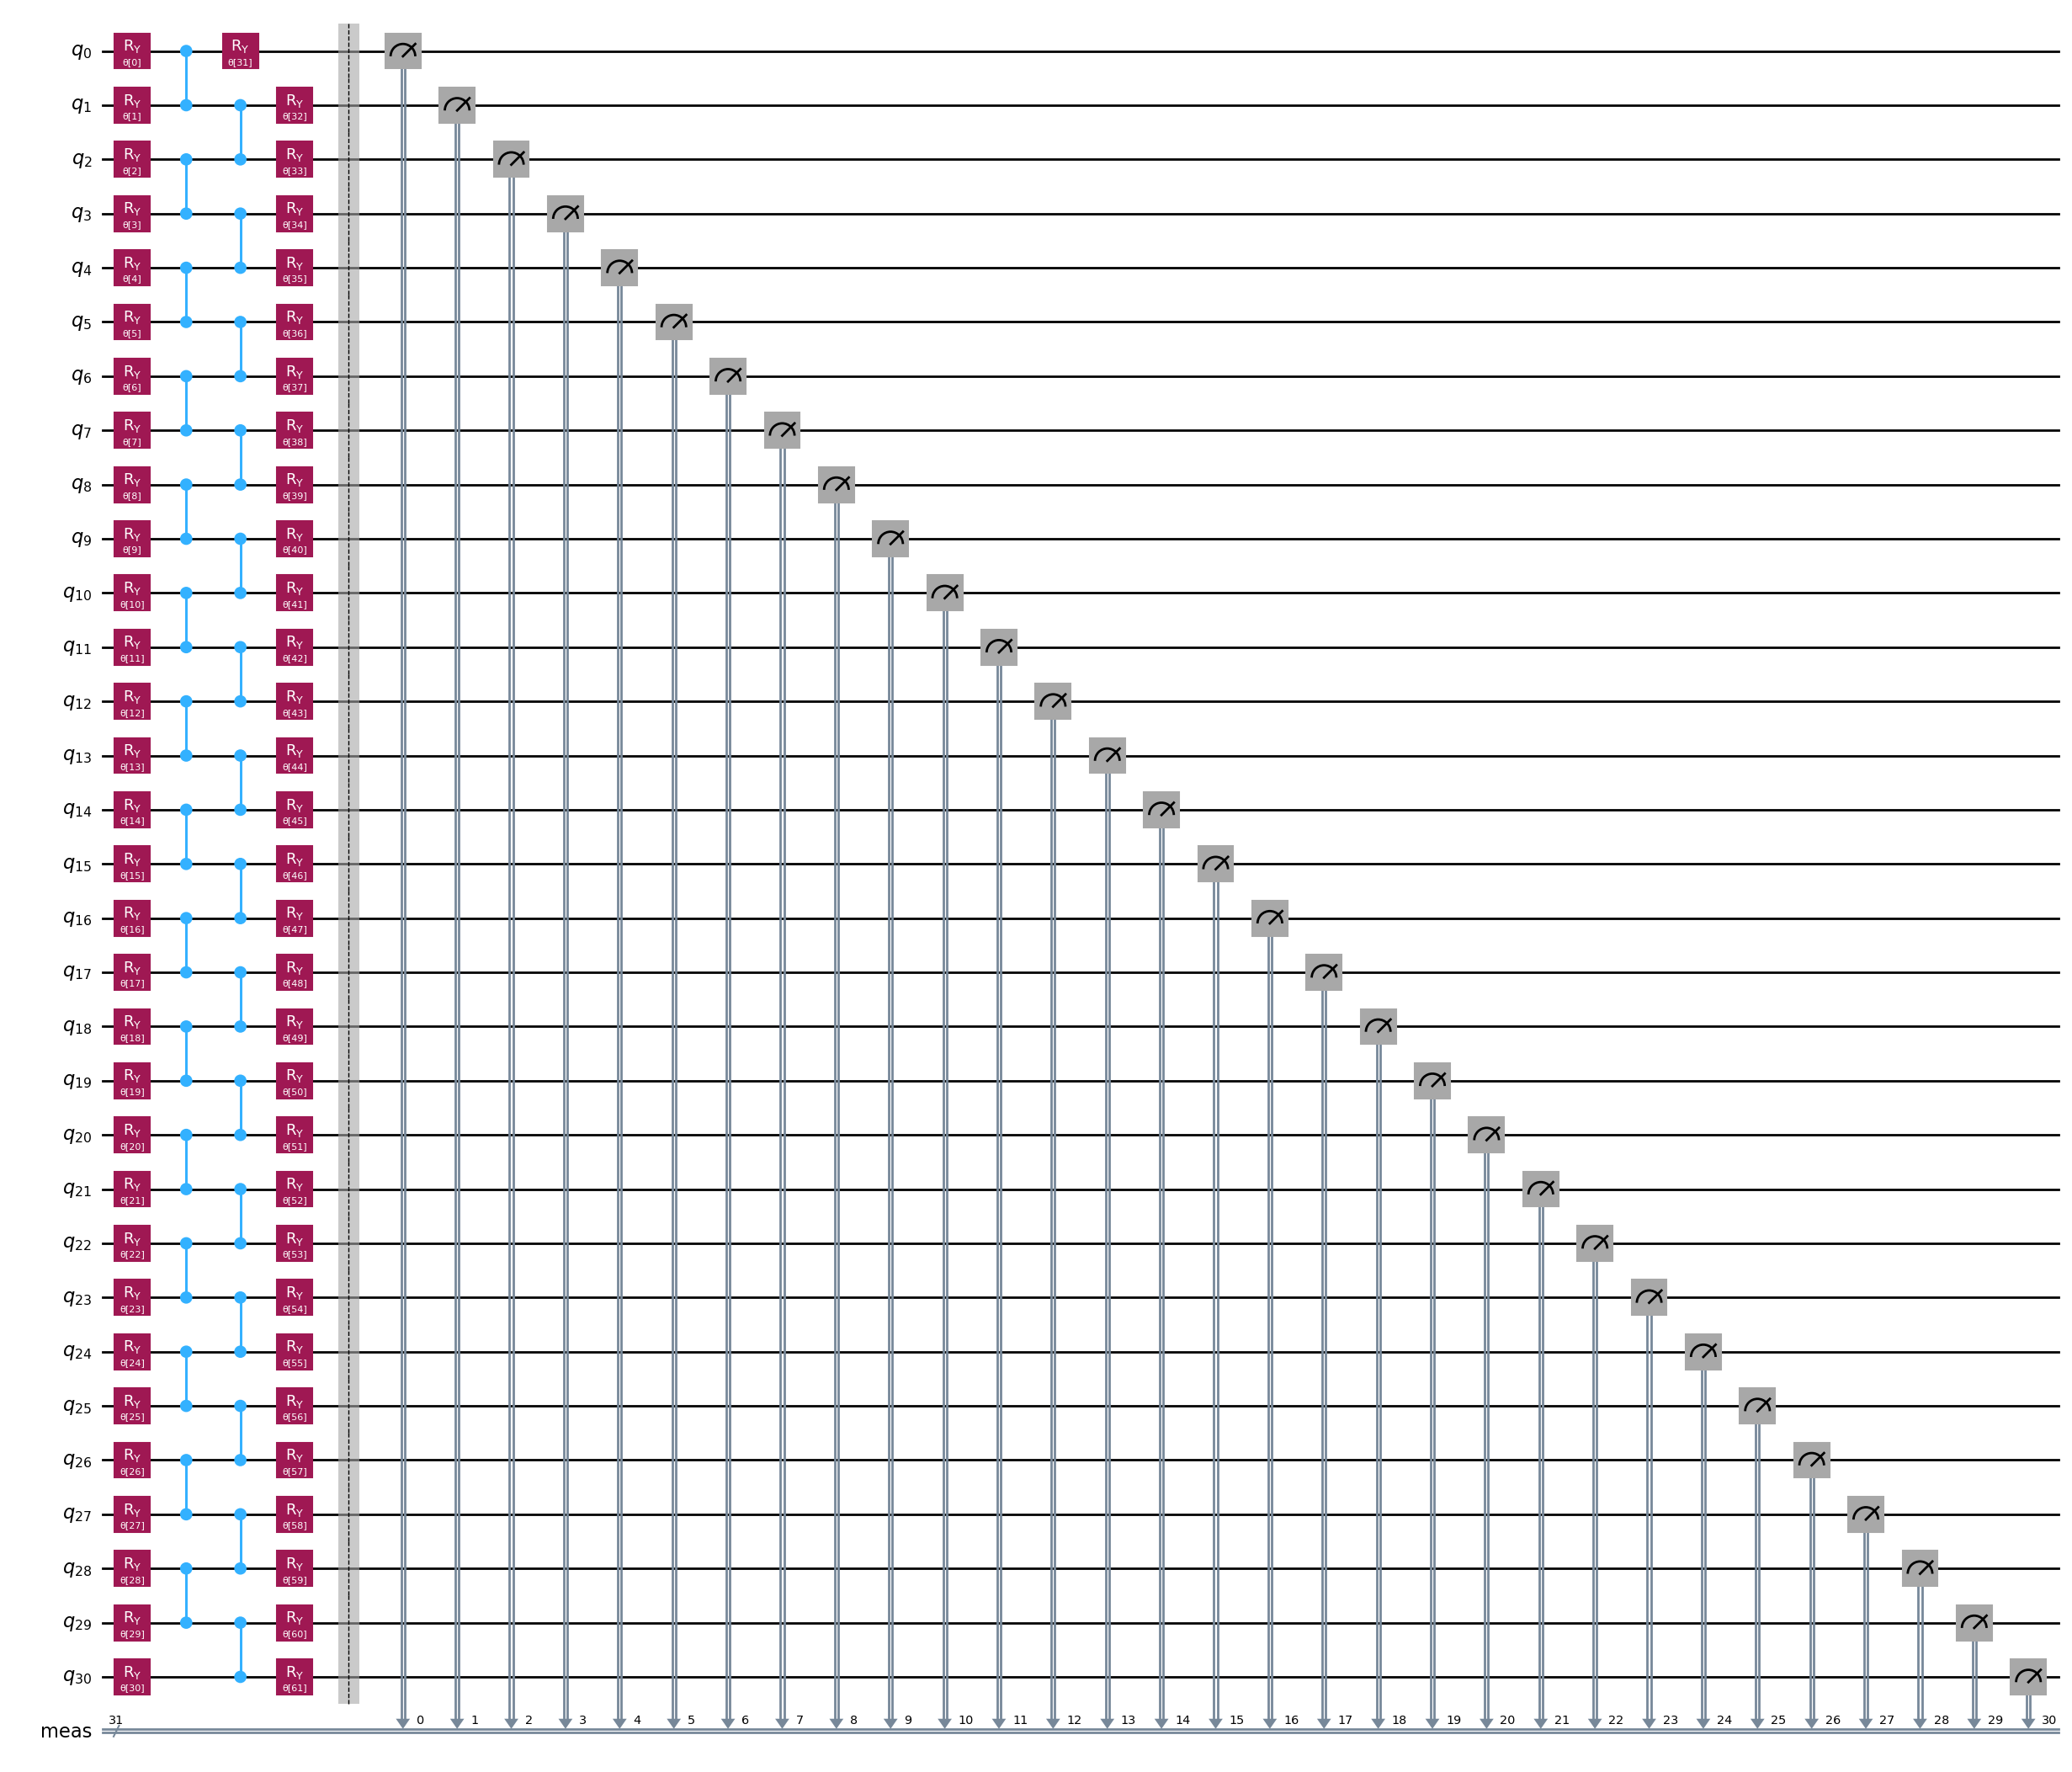

In [8]:
from qiskit import qpy
with open(f'{ROOT}/data/1/31bonds/TwoLocal1rep_piby3_AerSimulator_0.1/isa_ansatz.qpy', 'rb') as fd:
    isa_ansatz = qpy.load(fd)[0]

print('depth:', isa_ansatz.depth(), '    2q-depth: ', isa_ansatz.depth(lambda x:x.operation.num_qubits==2), '      num params: ', isa_ansatz.num_parameters)
isa_ansatz.draw('mpl', fold=-1,)

In [9]:
from qiskit import qpy
with open(f'{ROOT}/data/1/31bonds/TwoLocal1repFull_piby3_AerSimulator_0.1/isa_ansatz.qpy', 'rb') as fd:
    isa_ansatz = qpy.load(fd)[0]

print('depth:', isa_ansatz.depth(), '    2q-depth: ', isa_ansatz.depth(lambda x:x.operation.num_qubits==2))
isa_ansatz.draw('mpl', fold=-1,)

depth: 62     2q-depth:  59


In [10]:
df = Experiment.filter_experiments(df_all,
                                   ansatz='bfcd',
                                   ansatz_params_entanglement='bilinear',
                                   device='AerSimulator',
                                   optimizer='nft',
                                   has_step4=True
                                   )

In [11]:
len(df)

117

In [12]:
# ds = Experiment.filter_experiments(df_all,
#                                    experiment_id='bfcd1rep_piby3_AerSimulator_0.15/0',
#                                    has_step4=True
#                                    ).reset_index().loc[0]
ds = Experiment.filter_experiments(df_all,
                                   experiment_id='TwoLocal2rep_piby3_AerSimulator_0.15/9',
                                   has_step4=True
                                   ).reset_index().loc[0]
# ds = Experiment.filter_experiments(df_all,
#                                    experiment_id='bfcd1rep_piby3_AerSimulator_0.1/0',
#                                    has_step4=True
#                                    ).reset_index().loc[0]

In [13]:
ds

index                                                                       419
experiment_id                            TwoLocal2rep_piby3_AerSimulator_0.15/9
local_search_doe                                                           long
ansatz                                                                 TwoLocal
theta_initial                                                             piby3
device                                                             AerSimulator
optimizer                                                                   nft
alpha                                                                      0.15
theta_threshold                                                               0
lp_file                       /Users/gabrieleagliardi/Documents/GitHub/Clien...
shots                                                                      8192
refx                          [0, 1.0, 1.0, 1.0, 0, 0, 1.0, 0, 1.0, 1.0, 1.0...
refvalue                                

Text(0, 0.5, 'objective')

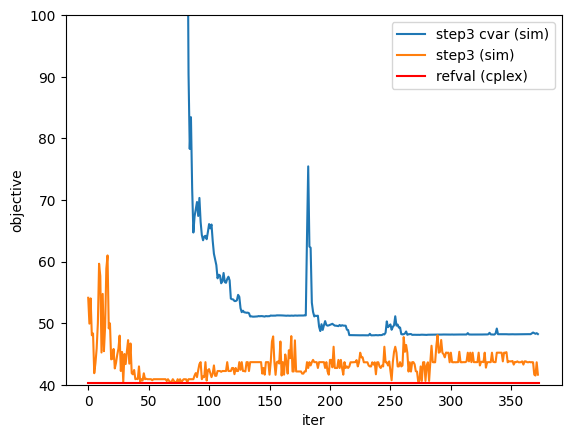

In [14]:
sns.lineplot(ds['step3_monitor_iter_gtheta'], label='step3 cvar (sim)')
# sns.lineplot(ds['step3_monitor_iter_best_fx'], label='step3 (sim) best')
sns.lineplot(ds['step3_iter_best_fx'], label='step3 (sim)')
sns.lineplot(x=[0,len(ds['step4_iter_best_fx'])], y=[ds['refvalue'], ds['refvalue']], label='refval (cplex)', c='r')
plt.ylim([40,100])
# plt.ylim([40.2,42])
plt.xlabel('iter')
plt.ylabel('objective')

Text(0, 0.5, 'objective')

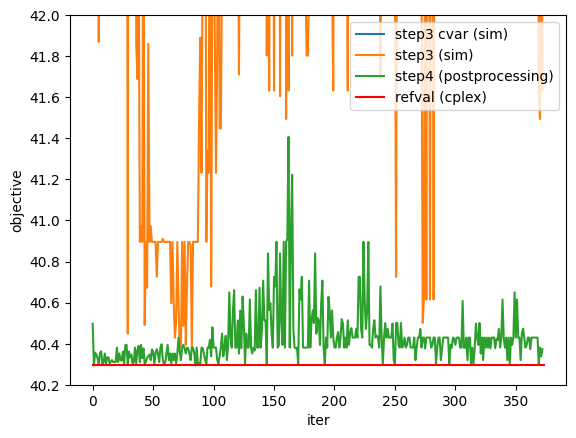

In [15]:
sns.lineplot(ds['step3_monitor_iter_gtheta'], label='step3 cvar (sim)')
# sns.lineplot(ds['step3_monitor_iter_best_fx'], label='step3 (sim) best')
sns.lineplot(ds['step3_iter_best_fx'], label='step3 (sim)')
sns.lineplot(ds['step4_iter_best_fx'], label='step4 (postprocessing)')
sns.lineplot(x=[0,len(ds['step4_iter_best_fx'])], y=[ds['refvalue'], ds['refvalue']], label='refval (cplex)', c='r')
plt.ylim([40,100])
plt.ylim([40.2,42])
plt.xlabel('iter')
plt.ylabel('objective')

Text(0, 0.5, 'fx_evals_per_shot')

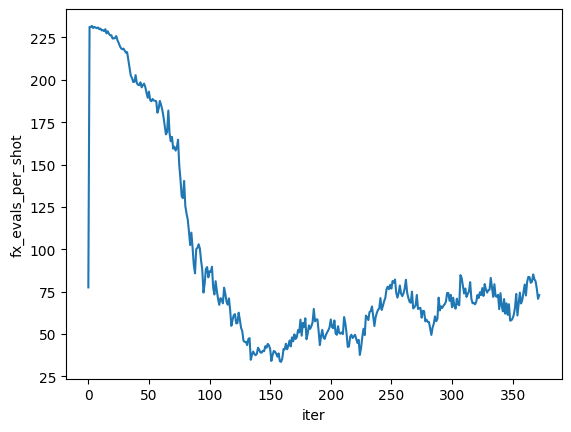

In [16]:
plt.plot(np.array(ds.step4_fx_evals)/ds.shots)
plt.xlabel('iter')
plt.ylabel('fx_evals_per_shot')
# plt.legend(loc='best')

# Plots for slides

Text(0, 0.5, 'objective')

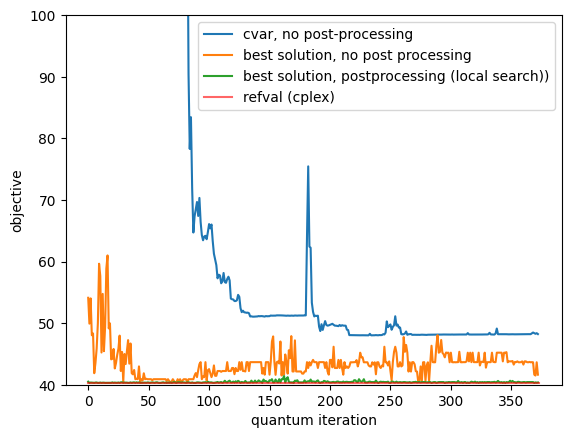

In [17]:
# TwoLocal2rep_piby3_AerSimulator_0.15/9

sns.lineplot(ds['step3_monitor_iter_gtheta'], label='cvar, no post-processing')
sns.lineplot(ds['step3_iter_best_fx'], label='best solution, no post processing')
sns.lineplot(ds['step4_iter_best_fx'], label='best solution, postprocessing (local search))')
sns.lineplot(x=[0,len(ds['step4_iter_best_fx'])], y=[ds['refvalue'], ds['refvalue']], label='refval (cplex)', c='r', alpha=.6)
plt.ylim([40,100])
# plt.ylim([40.2,42])
plt.xlabel('quantum iteration')
plt.ylabel('objective')


Text(0, 0.5, 'objective')

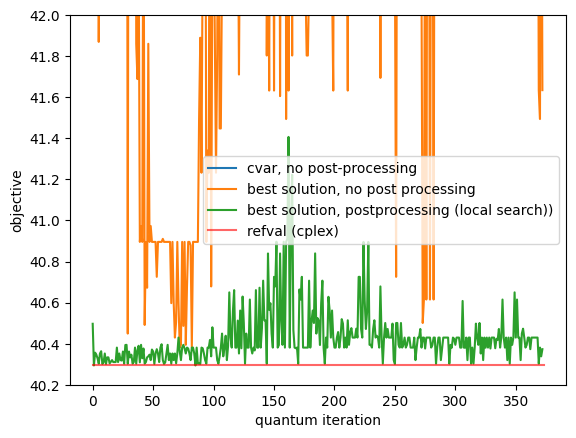

In [18]:
sns.lineplot(ds['step3_monitor_iter_gtheta'], label='cvar, no post-processing')
sns.lineplot(ds['step3_iter_best_fx'], label='best solution, no post processing')
sns.lineplot(ds['step4_iter_best_fx'], label='best solution, postprocessing (local search))')
sns.lineplot(x=[0,len(ds['step4_iter_best_fx'])], y=[ds['refvalue'], ds['refvalue']], label='refval (cplex)', c='r', alpha=.6)
plt.ylim([40.2,42])
plt.xlabel('quantum iteration')
plt.ylabel('objective')


Text(0, 0.5, 'evaluations of the cost function during post processing')

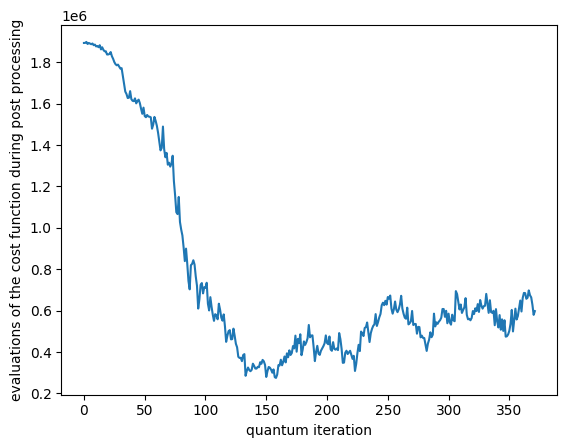

In [19]:
plt.plot(np.array(ds.step4_fx_evals[1:]))
plt.xlabel('quantum iteration')
plt.ylabel('evaluations of the cost function during post processing')
# plt.legend(loc='best')